In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def identity_block(x, filter):
    # copy tensor to variable called x_skip
    x_skip = x
    # Layer 1
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Layer 2
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])     
    x = tf.keras.layers.Activation('relu')(x)
    return x
def convolutional_block(x, filter):
    # copy tensor to variable called x_skip
    x_skip = x
    # Layer 1
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same', strides = (2,2))(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Layer 2
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Processing Residue with conv(1,1)
    x_skip = tf.keras.layers.Conv2D(filter, (1,1), strides = (2,2))(x_skip)
    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])     
    x = tf.keras.layers.Activation('relu')(x)
    return x
def ResNet34(shape = (32, 32, 3), classes = 10):
    # Step 1 (Setup Input Layer)
    x_input = tf.keras.layers.Input(shape)
    x = tf.keras.layers.ZeroPadding2D((3, 3))(x_input)
    # Step 2 (Initial Conv layer along with maxPool)
    x = tf.keras.layers.Conv2D(64, kernel_size=7, strides=2, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)
    # Define size of sub-blocks and initial filter size
    block_layers = [3, 4, 6, 3]
    filter_size = 64
    # Step 3 Add the Resnet Blocks
    for i in range(4):
        if i == 0:
            # For sub-block 1 Residual/Convolutional block not needed
            for j in range(block_layers[i]):
                x = identity_block(x, filter_size)
        else:
            # One Residual/Convolutional Block followed by Identity blocks
            # The filter size will go on increasing by a factor of 2
            filter_size = filter_size*2
            x = convolutional_block(x, filter_size)
            for j in range(block_layers[i] - 1):
                x = identity_block(x, filter_size)
    # Step 4 End Dense Network
    x = tf.keras.layers.AveragePooling2D((2,2), padding = 'same')(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(512, activation = 'relu')(x)
    x = tf.keras.layers.Dense(classes, activation = 'softmax')(x)
    model = tf.keras.models.Model(inputs = x_input, outputs = x, name = "ResNet34")
    return model

In [3]:
model = ResNet34()
model.summary()

Model: "ResNet34"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 38, 38, 3)   0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 19, 19, 64)   9472        ['zero_padding2d[0][0]']         
                                                                                                  
 batch_normalization (BatchNorm  (None, 19, 19, 64)  256         ['conv2d[0][0]']                 
 alization)                                                                                

                                                                                                  
 activation_8 (Activation)      (None, 5, 5, 128)    0           ['add_3[0][0]']                  
                                                                                                  
 conv2d_10 (Conv2D)             (None, 5, 5, 128)    147584      ['activation_8[0][0]']           
                                                                                                  
 batch_normalization_9 (BatchNo  (None, 5, 5, 128)   512         ['conv2d_10[0][0]']              
 rmalization)                                                                                     
                                                                                                  
 activation_9 (Activation)      (None, 5, 5, 128)    0           ['batch_normalization_9[0][0]']  
                                                                                                  
 conv2d_11

 ormalization)                                                                                    
                                                                                                  
 add_8 (Add)                    (None, 3, 3, 256)    0           ['batch_normalization_18[0][0]', 
                                                                  'activation_16[0][0]']          
                                                                                                  
 activation_18 (Activation)     (None, 3, 3, 256)    0           ['add_8[0][0]']                  
                                                                                                  
 conv2d_21 (Conv2D)             (None, 3, 3, 256)    590080      ['activation_18[0][0]']          
                                                                                                  
 batch_normalization_19 (BatchN  (None, 3, 3, 256)   1024        ['conv2d_21[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_28 (BatchN  (None, 2, 2, 512)   2048        ['conv2d_30[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 conv2d_31 (Conv2D)             (None, 2, 2, 512)    131584      ['activation_26[0][0]']          
                                                                                                  
 add_13 (Add)                   (None, 2, 2, 512)    0           ['batch_normalization_28[0][0]', 
                                                                  'conv2d_31[0][0]']              
                                                                                                  
 activation_28 (Activation)     (None, 2, 2, 512)    0           ['add_13[0][0]']                 
          

In [4]:
# mlp overfit on the moons dataset
from sklearn.datasets import make_moons
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from matplotlib import pyplot
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

In [5]:
X

array([[ 1.36698238, -0.23541584],
       [ 1.76404402, -0.34563288],
       [-0.37868174,  0.41004375],
       [ 1.15113747, -0.13597622],
       [ 2.31168314,  0.32295125],
       [ 0.53866045,  0.73704603],
       [-0.93583639,  1.00686001],
       [ 1.32563024, -0.13540284],
       [ 0.75398022, -0.37261326],
       [ 0.42764536, -0.38163078],
       [ 1.86426147, -0.04447877],
       [-0.83255618,  0.71258899],
       [ 0.22507434,  0.27186939],
       [ 0.21098847,  0.2244366 ],
       [ 0.05359594,  0.20843943],
       [-0.14691002,  0.85157719],
       [-0.75060111,  0.86559773],
       [-0.91043983,  0.56466749],
       [ 1.21265683, -0.6289975 ],
       [ 0.64660318,  0.72011433],
       [ 0.68237381,  0.08692362],
       [ 0.61031853, -0.48706856],
       [ 1.99715631,  0.24389764],
       [ 0.2077874 , -0.42914145],
       [ 0.35027414,  0.74199317],
       [-0.68407286,  0.66774772],
       [ 1.76290471,  0.02997561],
       [-0.13029538,  0.8163553 ],
       [-1.34872432,

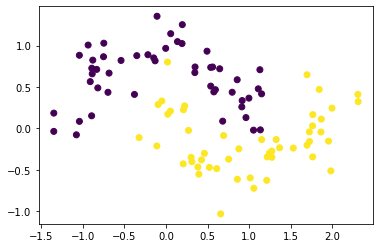

In [6]:
import matplotlib.pyplot as plt 
plt.scatter(X[:,0],X[:,1],c = y)

In [7]:
# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
print(trainX.shape,trainy.shape,testX.shape,testy.shape)

(30, 2) (30,) (70, 2) (70,)


Epoch 1/1000
1/1 [==============================] - 0s 487ms/step - loss: 0.7310 - accuracy: 0.1667 - val_loss: 0.7064 - val_accuracy: 0.3286
Epoch 2/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.7133 - accuracy: 0.1667 - val_loss: 0.6950 - val_accuracy: 0.5571
Epoch 3/1000
1/1 [==============================] - 0s 54ms/step - loss: 0.6962 - accuracy: 0.5000 - val_loss: 0.6839 - val_accuracy: 0.6714
Epoch 4/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.6795 - accuracy: 0.9000 - val_loss: 0.6732 - val_accuracy: 0.7286
Epoch 5/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.6634 - accuracy: 0.9333 - val_loss: 0.6630 - val_accuracy: 0.7286
Epoch 6/1000
1/1 [==============================] - 0s 54ms/step - loss: 0.6477 - accuracy: 0.9000 - val_loss: 0.6531 - val_accuracy: 0.7286
Epoch 7/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.6326 - accuracy: 0.9000 - val_loss: 0.6436 - val_accuracy: 0.7143
Epoch 8/1000

Epoch 59/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.2468 - accuracy: 0.9000 - val_loss: 0.4491 - val_accuracy: 0.7286
Epoch 60/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.2442 - accuracy: 0.9000 - val_loss: 0.4484 - val_accuracy: 0.7286
Epoch 61/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.2417 - accuracy: 0.9000 - val_loss: 0.4476 - val_accuracy: 0.7286
Epoch 62/1000
1/1 [==============================] - 0s 48ms/step - loss: 0.2393 - accuracy: 0.9000 - val_loss: 0.4470 - val_accuracy: 0.7429
Epoch 63/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.2370 - accuracy: 0.9000 - val_loss: 0.4463 - val_accuracy: 0.7429
Epoch 64/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.2348 - accuracy: 0.9000 - val_loss: 0.4457 - val_accuracy: 0.7429
Epoch 65/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.2327 - accuracy: 0.9000 - val_loss: 0.4452 - val_accuracy: 0.7429
Epoch 

1/1 [==============================] - 0s 49ms/step - loss: 0.1796 - accuracy: 0.9000 - val_loss: 0.4160 - val_accuracy: 0.7571
Epoch 117/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.1790 - accuracy: 0.9000 - val_loss: 0.4152 - val_accuracy: 0.7714
Epoch 118/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.1784 - accuracy: 0.9000 - val_loss: 0.4145 - val_accuracy: 0.7714
Epoch 119/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.1778 - accuracy: 0.9000 - val_loss: 0.4137 - val_accuracy: 0.7714
Epoch 120/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.1773 - accuracy: 0.9333 - val_loss: 0.4130 - val_accuracy: 0.7857
Epoch 121/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.1767 - accuracy: 0.9333 - val_loss: 0.4122 - val_accuracy: 0.7857
Epoch 122/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.1761 - accuracy: 0.9333 - val_loss: 0.4115 - val_accuracy: 0.8000
Epoch 123/1000

1/1 [==============================] - 0s 32ms/step - loss: 0.1550 - accuracy: 0.9667 - val_loss: 0.3812 - val_accuracy: 0.8286
Epoch 174/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.1547 - accuracy: 0.9667 - val_loss: 0.3808 - val_accuracy: 0.8286
Epoch 175/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.1544 - accuracy: 0.9667 - val_loss: 0.3805 - val_accuracy: 0.8286
Epoch 176/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.1541 - accuracy: 0.9667 - val_loss: 0.3801 - val_accuracy: 0.8286
Epoch 177/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.1538 - accuracy: 0.9667 - val_loss: 0.3797 - val_accuracy: 0.8286
Epoch 178/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.1535 - accuracy: 0.9667 - val_loss: 0.3794 - val_accuracy: 0.8286
Epoch 179/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.1532 - accuracy: 0.9667 - val_loss: 0.3791 - val_accuracy: 0.8286
Epoch 180/1000

1/1 [==============================] - 0s 42ms/step - loss: 0.1429 - accuracy: 0.9667 - val_loss: 0.3708 - val_accuracy: 0.8143
Epoch 231/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.1428 - accuracy: 0.9667 - val_loss: 0.3708 - val_accuracy: 0.8143
Epoch 232/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.1427 - accuracy: 0.9667 - val_loss: 0.3708 - val_accuracy: 0.8143
Epoch 233/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.1425 - accuracy: 0.9667 - val_loss: 0.3707 - val_accuracy: 0.8143
Epoch 234/1000
1/1 [==============================] - 0s 53ms/step - loss: 0.1424 - accuracy: 0.9667 - val_loss: 0.3707 - val_accuracy: 0.8143
Epoch 235/1000
1/1 [==============================] - 0s 49ms/step - loss: 0.1423 - accuracy: 0.9667 - val_loss: 0.3707 - val_accuracy: 0.8143
Epoch 236/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.1421 - accuracy: 0.9667 - val_loss: 0.3707 - val_accuracy: 0.8143
Epoch 237/1000

1/1 [==============================] - 0s 34ms/step - loss: 0.1365 - accuracy: 0.9667 - val_loss: 0.3707 - val_accuracy: 0.8286
Epoch 288/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.1364 - accuracy: 0.9667 - val_loss: 0.3706 - val_accuracy: 0.8286
Epoch 289/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.1363 - accuracy: 0.9667 - val_loss: 0.3706 - val_accuracy: 0.8286
Epoch 290/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.1362 - accuracy: 0.9667 - val_loss: 0.3706 - val_accuracy: 0.8286
Epoch 291/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.1361 - accuracy: 0.9667 - val_loss: 0.3706 - val_accuracy: 0.8286
Epoch 292/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.1360 - accuracy: 0.9667 - val_loss: 0.3706 - val_accuracy: 0.8286
Epoch 293/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.1359 - accuracy: 0.9667 - val_loss: 0.3706 - val_accuracy: 0.8286
Epoch 294/1000

1/1 [==============================] - 0s 36ms/step - loss: 0.1309 - accuracy: 0.9667 - val_loss: 0.3682 - val_accuracy: 0.8429
Epoch 345/1000
1/1 [==============================] - 0s 51ms/step - loss: 0.1308 - accuracy: 0.9667 - val_loss: 0.3681 - val_accuracy: 0.8429
Epoch 346/1000
1/1 [==============================] - 0s 51ms/step - loss: 0.1307 - accuracy: 0.9667 - val_loss: 0.3680 - val_accuracy: 0.8429
Epoch 347/1000
1/1 [==============================] - 0s 51ms/step - loss: 0.1306 - accuracy: 0.9667 - val_loss: 0.3679 - val_accuracy: 0.8429
Epoch 348/1000
1/1 [==============================] - 0s 42ms/step - loss: 0.1305 - accuracy: 0.9667 - val_loss: 0.3678 - val_accuracy: 0.8429
Epoch 349/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.1303 - accuracy: 0.9667 - val_loss: 0.3677 - val_accuracy: 0.8429
Epoch 350/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.1302 - accuracy: 0.9667 - val_loss: 0.3677 - val_accuracy: 0.8429
Epoch 351/1000

1/1 [==============================] - 0s 32ms/step - loss: 0.1243 - accuracy: 0.9667 - val_loss: 0.3610 - val_accuracy: 0.8429
Epoch 402/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.1242 - accuracy: 0.9667 - val_loss: 0.3607 - val_accuracy: 0.8429
Epoch 403/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.1240 - accuracy: 0.9667 - val_loss: 0.3604 - val_accuracy: 0.8429
Epoch 404/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.1239 - accuracy: 0.9667 - val_loss: 0.3602 - val_accuracy: 0.8429
Epoch 405/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.1238 - accuracy: 0.9667 - val_loss: 0.3600 - val_accuracy: 0.8429
Epoch 406/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.1236 - accuracy: 0.9667 - val_loss: 0.3599 - val_accuracy: 0.8429
Epoch 407/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.1235 - accuracy: 0.9667 - val_loss: 0.3597 - val_accuracy: 0.8429
Epoch 408/1000

1/1 [==============================] - 0s 37ms/step - loss: 0.1152 - accuracy: 0.9667 - val_loss: 0.3461 - val_accuracy: 0.8429
Epoch 459/1000
1/1 [==============================] - 0s 49ms/step - loss: 0.1150 - accuracy: 0.9667 - val_loss: 0.3458 - val_accuracy: 0.8429
Epoch 460/1000
1/1 [==============================] - 0s 52ms/step - loss: 0.1148 - accuracy: 0.9667 - val_loss: 0.3455 - val_accuracy: 0.8429
Epoch 461/1000
1/1 [==============================] - 0s 53ms/step - loss: 0.1146 - accuracy: 0.9667 - val_loss: 0.3452 - val_accuracy: 0.8429
Epoch 462/1000
1/1 [==============================] - 0s 54ms/step - loss: 0.1144 - accuracy: 0.9667 - val_loss: 0.3449 - val_accuracy: 0.8429
Epoch 463/1000
1/1 [==============================] - 0s 50ms/step - loss: 0.1142 - accuracy: 0.9667 - val_loss: 0.3446 - val_accuracy: 0.8429
Epoch 464/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.1140 - accuracy: 0.9667 - val_loss: 0.3443 - val_accuracy: 0.8429
Epoch 465/1000

1/1 [==============================] - 0s 33ms/step - loss: 0.1036 - accuracy: 0.9667 - val_loss: 0.3243 - val_accuracy: 0.8429
Epoch 516/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.1034 - accuracy: 0.9667 - val_loss: 0.3237 - val_accuracy: 0.8429
Epoch 517/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.1031 - accuracy: 0.9667 - val_loss: 0.3231 - val_accuracy: 0.8429
Epoch 518/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.1029 - accuracy: 0.9667 - val_loss: 0.3226 - val_accuracy: 0.8429
Epoch 519/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.1026 - accuracy: 0.9667 - val_loss: 0.3221 - val_accuracy: 0.8429
Epoch 520/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.1024 - accuracy: 0.9667 - val_loss: 0.3216 - val_accuracy: 0.8429
Epoch 521/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.1022 - accuracy: 0.9667 - val_loss: 0.3210 - val_accuracy: 0.8429
Epoch 522/1000

1/1 [==============================] - 0s 36ms/step - loss: 0.0889 - accuracy: 0.9667 - val_loss: 0.2976 - val_accuracy: 0.8857
Epoch 573/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.0886 - accuracy: 0.9667 - val_loss: 0.2973 - val_accuracy: 0.8857
Epoch 574/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.0883 - accuracy: 0.9667 - val_loss: 0.2969 - val_accuracy: 0.8857
Epoch 575/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.0880 - accuracy: 0.9667 - val_loss: 0.2966 - val_accuracy: 0.8857
Epoch 576/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.0877 - accuracy: 0.9667 - val_loss: 0.2962 - val_accuracy: 0.8857
Epoch 577/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.0875 - accuracy: 0.9667 - val_loss: 0.2959 - val_accuracy: 0.8857
Epoch 578/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.0872 - accuracy: 0.9667 - val_loss: 0.2955 - val_accuracy: 0.8857
Epoch 579/1000

1/1 [==============================] - 0s 39ms/step - loss: 0.0735 - accuracy: 0.9667 - val_loss: 0.2743 - val_accuracy: 0.9000
Epoch 630/1000
1/1 [==============================] - 0s 47ms/step - loss: 0.0732 - accuracy: 0.9667 - val_loss: 0.2740 - val_accuracy: 0.9000
Epoch 631/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.0730 - accuracy: 0.9667 - val_loss: 0.2736 - val_accuracy: 0.9000
Epoch 632/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.0727 - accuracy: 0.9667 - val_loss: 0.2732 - val_accuracy: 0.9000
Epoch 633/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.0724 - accuracy: 0.9667 - val_loss: 0.2727 - val_accuracy: 0.9000
Epoch 634/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.0722 - accuracy: 0.9667 - val_loss: 0.2723 - val_accuracy: 0.9000
Epoch 635/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.0719 - accuracy: 0.9667 - val_loss: 0.2719 - val_accuracy: 0.9000
Epoch 636/1000

1/1 [==============================] - 0s 36ms/step - loss: 0.0593 - accuracy: 0.9667 - val_loss: 0.2542 - val_accuracy: 0.9286
Epoch 687/1000
1/1 [==============================] - 0s 37ms/step - loss: 0.0591 - accuracy: 0.9667 - val_loss: 0.2540 - val_accuracy: 0.9286
Epoch 688/1000
1/1 [==============================] - 0s 50ms/step - loss: 0.0589 - accuracy: 0.9667 - val_loss: 0.2537 - val_accuracy: 0.9286
Epoch 689/1000
1/1 [==============================] - 0s 43ms/step - loss: 0.0586 - accuracy: 0.9667 - val_loss: 0.2534 - val_accuracy: 0.9286
Epoch 690/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.0584 - accuracy: 0.9667 - val_loss: 0.2531 - val_accuracy: 0.9286
Epoch 691/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.0582 - accuracy: 0.9667 - val_loss: 0.2529 - val_accuracy: 0.9286
Epoch 692/1000
1/1 [==============================] - 0s 46ms/step - loss: 0.0579 - accuracy: 0.9667 - val_loss: 0.2526 - val_accuracy: 0.9286
Epoch 693/1000

1/1 [==============================] - 0s 27ms/step - loss: 0.0471 - accuracy: 1.0000 - val_loss: 0.2417 - val_accuracy: 0.9286
Epoch 744/1000
1/1 [==============================] - 0s 28ms/step - loss: 0.0469 - accuracy: 1.0000 - val_loss: 0.2415 - val_accuracy: 0.9286
Epoch 745/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.0467 - accuracy: 1.0000 - val_loss: 0.2414 - val_accuracy: 0.9286
Epoch 746/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.0465 - accuracy: 1.0000 - val_loss: 0.2413 - val_accuracy: 0.9286
Epoch 747/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.0463 - accuracy: 1.0000 - val_loss: 0.2411 - val_accuracy: 0.9286
Epoch 748/1000
1/1 [==============================] - 0s 35ms/step - loss: 0.0461 - accuracy: 1.0000 - val_loss: 0.2409 - val_accuracy: 0.9286
Epoch 749/1000
1/1 [==============================] - 0s 36ms/step - loss: 0.0459 - accuracy: 1.0000 - val_loss: 0.2407 - val_accuracy: 0.9286
Epoch 750/1000

1/1 [==============================] - 0s 32ms/step - loss: 0.0372 - accuracy: 1.0000 - val_loss: 0.2348 - val_accuracy: 0.9286
Epoch 801/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.0371 - accuracy: 1.0000 - val_loss: 0.2347 - val_accuracy: 0.9286
Epoch 802/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.0369 - accuracy: 1.0000 - val_loss: 0.2346 - val_accuracy: 0.9286
Epoch 803/1000
1/1 [==============================] - 0s 44ms/step - loss: 0.0368 - accuracy: 1.0000 - val_loss: 0.2345 - val_accuracy: 0.9286
Epoch 804/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.0366 - accuracy: 1.0000 - val_loss: 0.2344 - val_accuracy: 0.9286
Epoch 805/1000
1/1 [==============================] - 0s 40ms/step - loss: 0.0365 - accuracy: 1.0000 - val_loss: 0.2344 - val_accuracy: 0.9286
Epoch 806/1000
1/1 [==============================] - 0s 50ms/step - loss: 0.0363 - accuracy: 1.0000 - val_loss: 0.2343 - val_accuracy: 0.9286
Epoch 807/1000

1/1 [==============================] - 0s 31ms/step - loss: 0.0295 - accuracy: 1.0000 - val_loss: 0.2338 - val_accuracy: 0.9286
Epoch 858/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.0294 - accuracy: 1.0000 - val_loss: 0.2339 - val_accuracy: 0.9286
Epoch 859/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.0293 - accuracy: 1.0000 - val_loss: 0.2339 - val_accuracy: 0.9286
Epoch 860/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.0292 - accuracy: 1.0000 - val_loss: 0.2340 - val_accuracy: 0.9286
Epoch 861/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.0291 - accuracy: 1.0000 - val_loss: 0.2340 - val_accuracy: 0.9286
Epoch 862/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.0289 - accuracy: 1.0000 - val_loss: 0.2341 - val_accuracy: 0.9286
Epoch 863/1000
1/1 [==============================] - 0s 33ms/step - loss: 0.0288 - accuracy: 1.0000 - val_loss: 0.2341 - val_accuracy: 0.9286
Epoch 864/1000

1/1 [==============================] - 0s 35ms/step - loss: 0.0236 - accuracy: 1.0000 - val_loss: 0.2376 - val_accuracy: 0.9429
Epoch 915/1000
1/1 [==============================] - 0s 54ms/step - loss: 0.0235 - accuracy: 1.0000 - val_loss: 0.2377 - val_accuracy: 0.9429
Epoch 916/1000
1/1 [==============================] - 0s 55ms/step - loss: 0.0235 - accuracy: 1.0000 - val_loss: 0.2378 - val_accuracy: 0.9429
Epoch 917/1000
1/1 [==============================] - 0s 50ms/step - loss: 0.0234 - accuracy: 1.0000 - val_loss: 0.2379 - val_accuracy: 0.9429
Epoch 918/1000
1/1 [==============================] - 0s 45ms/step - loss: 0.0233 - accuracy: 1.0000 - val_loss: 0.2380 - val_accuracy: 0.9429
Epoch 919/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.0232 - accuracy: 1.0000 - val_loss: 0.2381 - val_accuracy: 0.9429
Epoch 920/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.0231 - accuracy: 1.0000 - val_loss: 0.2382 - val_accuracy: 0.9429
Epoch 921/1000

1/1 [==============================] - 0s 35ms/step - loss: 0.0191 - accuracy: 1.0000 - val_loss: 0.2434 - val_accuracy: 0.9429
Epoch 972/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.0191 - accuracy: 1.0000 - val_loss: 0.2436 - val_accuracy: 0.9429
Epoch 973/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.0190 - accuracy: 1.0000 - val_loss: 0.2437 - val_accuracy: 0.9429
Epoch 974/1000
1/1 [==============================] - 0s 29ms/step - loss: 0.0189 - accuracy: 1.0000 - val_loss: 0.2438 - val_accuracy: 0.9429
Epoch 975/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.0189 - accuracy: 1.0000 - val_loss: 0.2439 - val_accuracy: 0.9429
Epoch 976/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.0188 - accuracy: 1.0000 - val_loss: 0.2440 - val_accuracy: 0.9429
Epoch 977/1000
1/1 [==============================] - 0s 32ms/step - loss: 0.0187 - accuracy: 1.0000 - val_loss: 0.2441 - val_accuracy: 0.9429
Epoch 978/1000

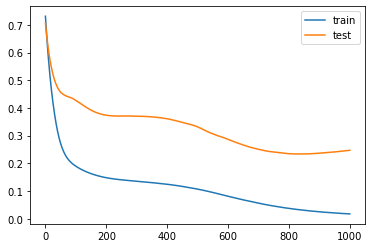

In [9]:
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
###

# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=1000, verbose=1)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()